# **Practice Notebook For Regression Models:**

---

## **About Author:**

---

[<img src="https://media.licdn.com/dms/image/v2/D4D03AQEsEJ_gVNnU3w/profile-displayphoto-shrink_200_200/profile-displayphoto-shrink_200_200/0/1720678393429?e=2147483647&v=beta&t=RALfVAKvT6TmP2BBpil_CGzZK5L5ykNUou5yModXTVw" width="20%">](https://shaheer.kesug.com)

**Mr. ShaheerAli**  
*Data Scientist / ML Engineer*\
BS Computer Science

<a href="https://www.youtube.com/channel/UCUTphw52izMNv9W6AOIFGJA">
  <img width="50" height="50" src="https://img.icons8.com/color/48/youtube-play.png" alt="youtube-play"/>
</a>
<a href="https://twitter.com/__shaheerali190">
  <img width="50" height="50" src="https://img.icons8.com/dotty/80/x.png" alt="x"/>
</a>
<a href="https://www.linkedin.com/in/shaheer-ali-2761aa303/">
  <img width="50" height="50" src="https://img.icons8.com/color/48/linkedin.png" alt="linkedin"/>
</a>
<a href="https://github.com/shaheeralics">
  <img width="50" height="50" src="https://img.icons8.com/ios-glyphs/50/github.png" alt="github"/>
</a>
<a href="https://www.kaggle.com/shaheerali197">
  <img width="50" height="50" src="https://img.icons8.com/clouds/100/kaggle.png" alt="kaggle"/>
</a>

[Portfolio Site]('https://shaheer.kesug.com')

---


## **About Dataset**
---

### Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

### Business Goal
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

`Please Note` : The dataset provided is for learning purpose. Please don’t draw any inference with real world scenario.

Click [`here`](https://www.kaggle.com/datasets/hellbuoy/car-price-prediction/data) to get the dataset.

---
## Meta Data:

| **Attribute**        | **Description**                                                                 |
|----------------------|---------------------------------------------------------------------------------|
| **Car_ID**           | Unique ID of each observation (Integer)                                          |
| **Symboling**        | Insurance risk rating: +3 indicates risky, -3 indicates safe (Categorical)      |
| **carCompany**       | Name of the car company (Categorical)                                            |
| **fueltype**         | Fuel type of the car (e.g., gas or diesel) (Categorical)                         |
| **aspiration**       | Aspiration used in the car (Categorical)                                         |
| **doornumber**       | Number of doors in the car (Categorical)                                         |
| **carbody**          | Body type of the car (Categorical)                                               |
| **drivewheel**       | Type of drive wheel (Categorical)                                                |
| **enginelocation**   | Location of the car engine (Categorical)                                         |
| **wheelbase**        | Wheelbase of the car (Numeric)                                                    |
| **carlength**        | Length of the car (Numeric)                                                       |
| **carwidth**         | Width of the car (Numeric)                                                        |
| **carheight**        | Height of the car (Numeric)                                                       |
| **curbweight**       | Weight of the car without occupants or baggage (Numeric)                          |
| **enginetype**       | Type of engine (Categorical)                                                       |
| **cylindernumber**   | Number of cylinders in the car (Categorical)                                      |
| **enginesize**       | Size of the engine (Numeric)                                                        |
| **fuelsystem**       | Fuel system of the car (Categorical)                                               |
| **boreratio**        | Bore ratio of the car (Numeric)                                                    |
| **stroke**           | Stroke or volume inside the engine (Numeric)                                      |
| **compressionratio** | Compression ratio of the car (Numeric)                                            |
| **horsepower**       | Horsepower of the car (Numeric)                                                    |
| **peakrpm**          | Peak RPM of the car (Numeric)                                                      |
| **citympg**          | Mileage in the city (Numeric)                                                      |
| **highwaympg**       | Mileage on the highway (Numeric)                                                   |
| **price**            | Price of the car (Dependent variable) (Numeric)                                    |

---


Importing Libraries

In [16]:
# importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

# importing all the evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# importing encoder

from sklearn.preprocessing import LabelEncoder


Reading The Data

In [17]:
# import dataset
df = pd.read_csv('../../../../datasets/car price/CarPrice_Assignment.csv')

# **1_Exploratory Data Analysis:**

In [18]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [19]:
# display maximum columns
pd.set_option('display.max_columns', None)

In [20]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [21]:
# now want to recheck the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [22]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

## **1_Feature Selection:**

In [23]:
# numeric columns in another dataframe
df_num = df.select_dtypes(include=np.number)
df_num.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


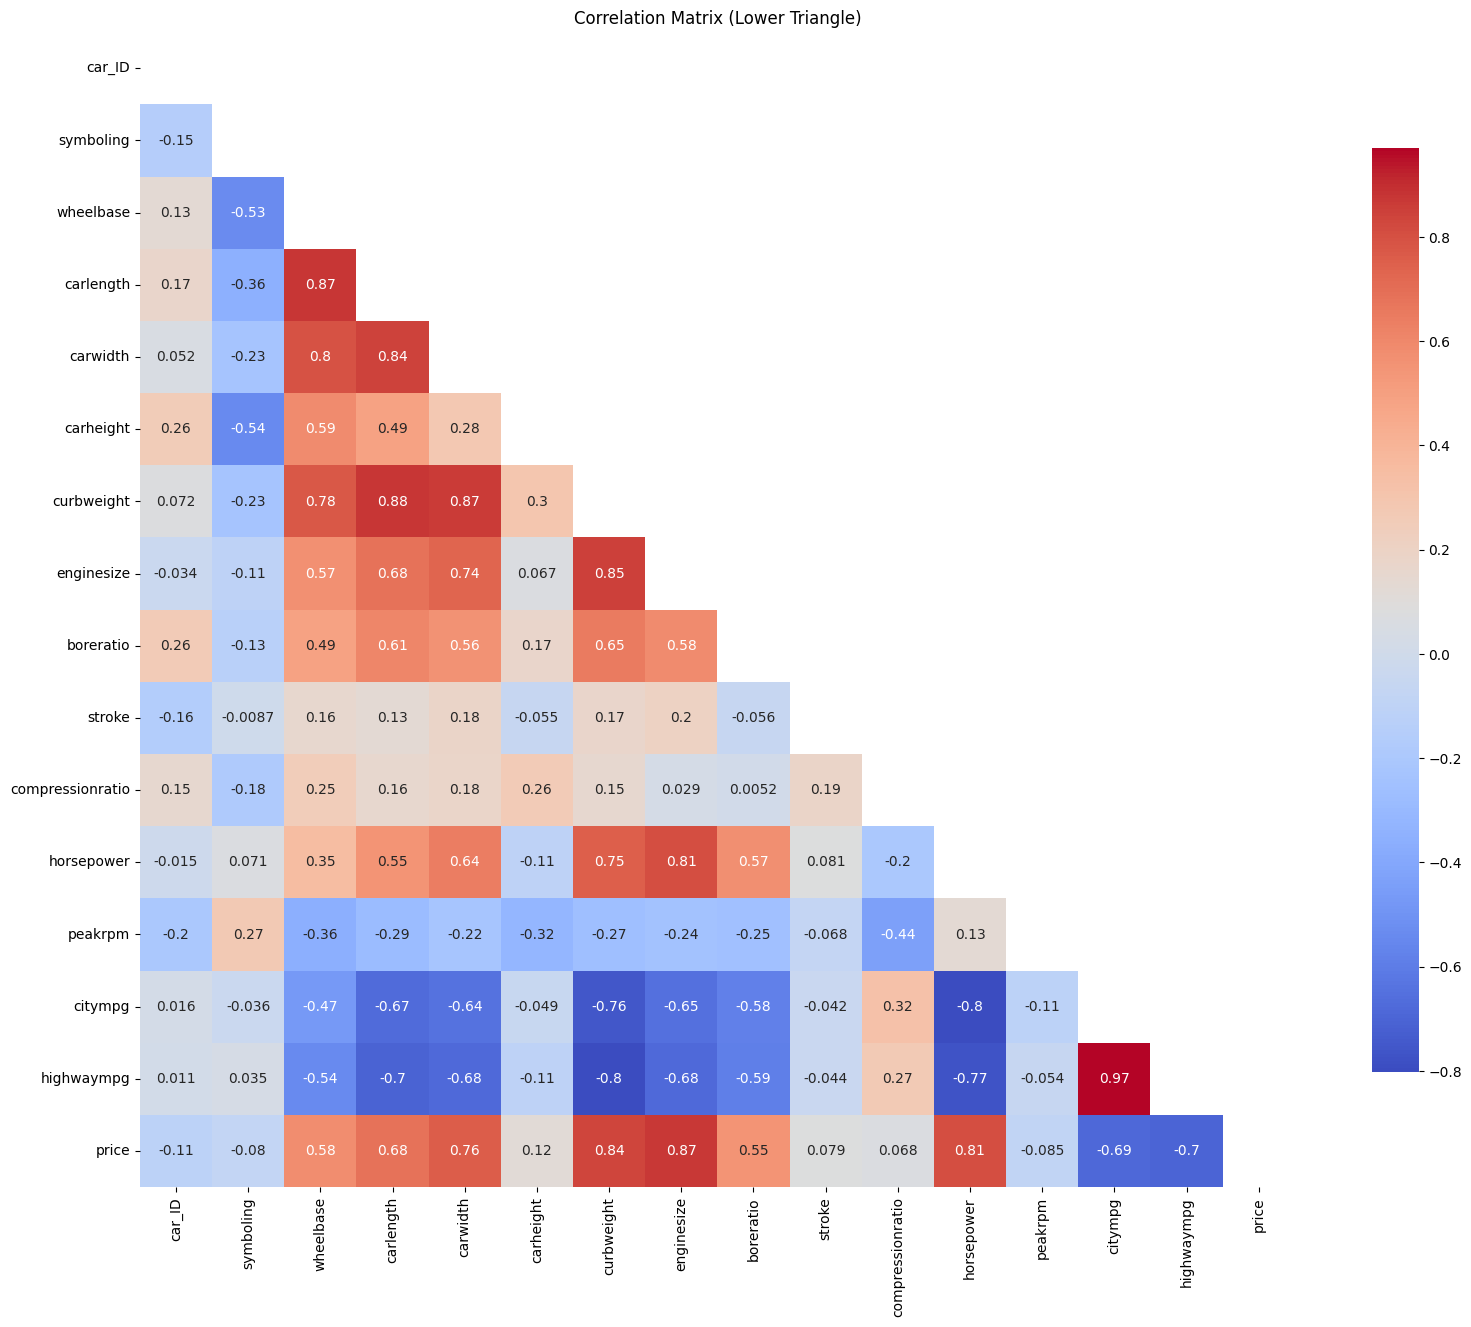

In [24]:
# Calculate the correlation matrix
corr = df_num.corr()

# Create a mask to cover the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Draw the heatmap with the mask
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Set the title and show the plot
plt.title('Correlation Matrix (Lower Triangle)')
plt.show()

In [25]:
# Assuming df is your DataFrame
# Compute the correlation matrix
correlation_matrix = df_num.corr()

# Extract the correlations with respect to the 'price' column
price_corr = correlation_matrix['price']

# Identify columns to drop based on the correlation range
columns_to_drop = price_corr[(price_corr < 0.3) & (price_corr > -0.3)].index

# Drop the identified columns from the DataFrame
df_num = df_num.drop(columns=columns_to_drop)

# Display the cleaned DataFrame
print("Columns dropped:", columns_to_drop.tolist())
df_num.head()


Columns dropped: ['car_ID', 'symboling', 'carheight', 'stroke', 'compressionratio', 'peakrpm']


,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0


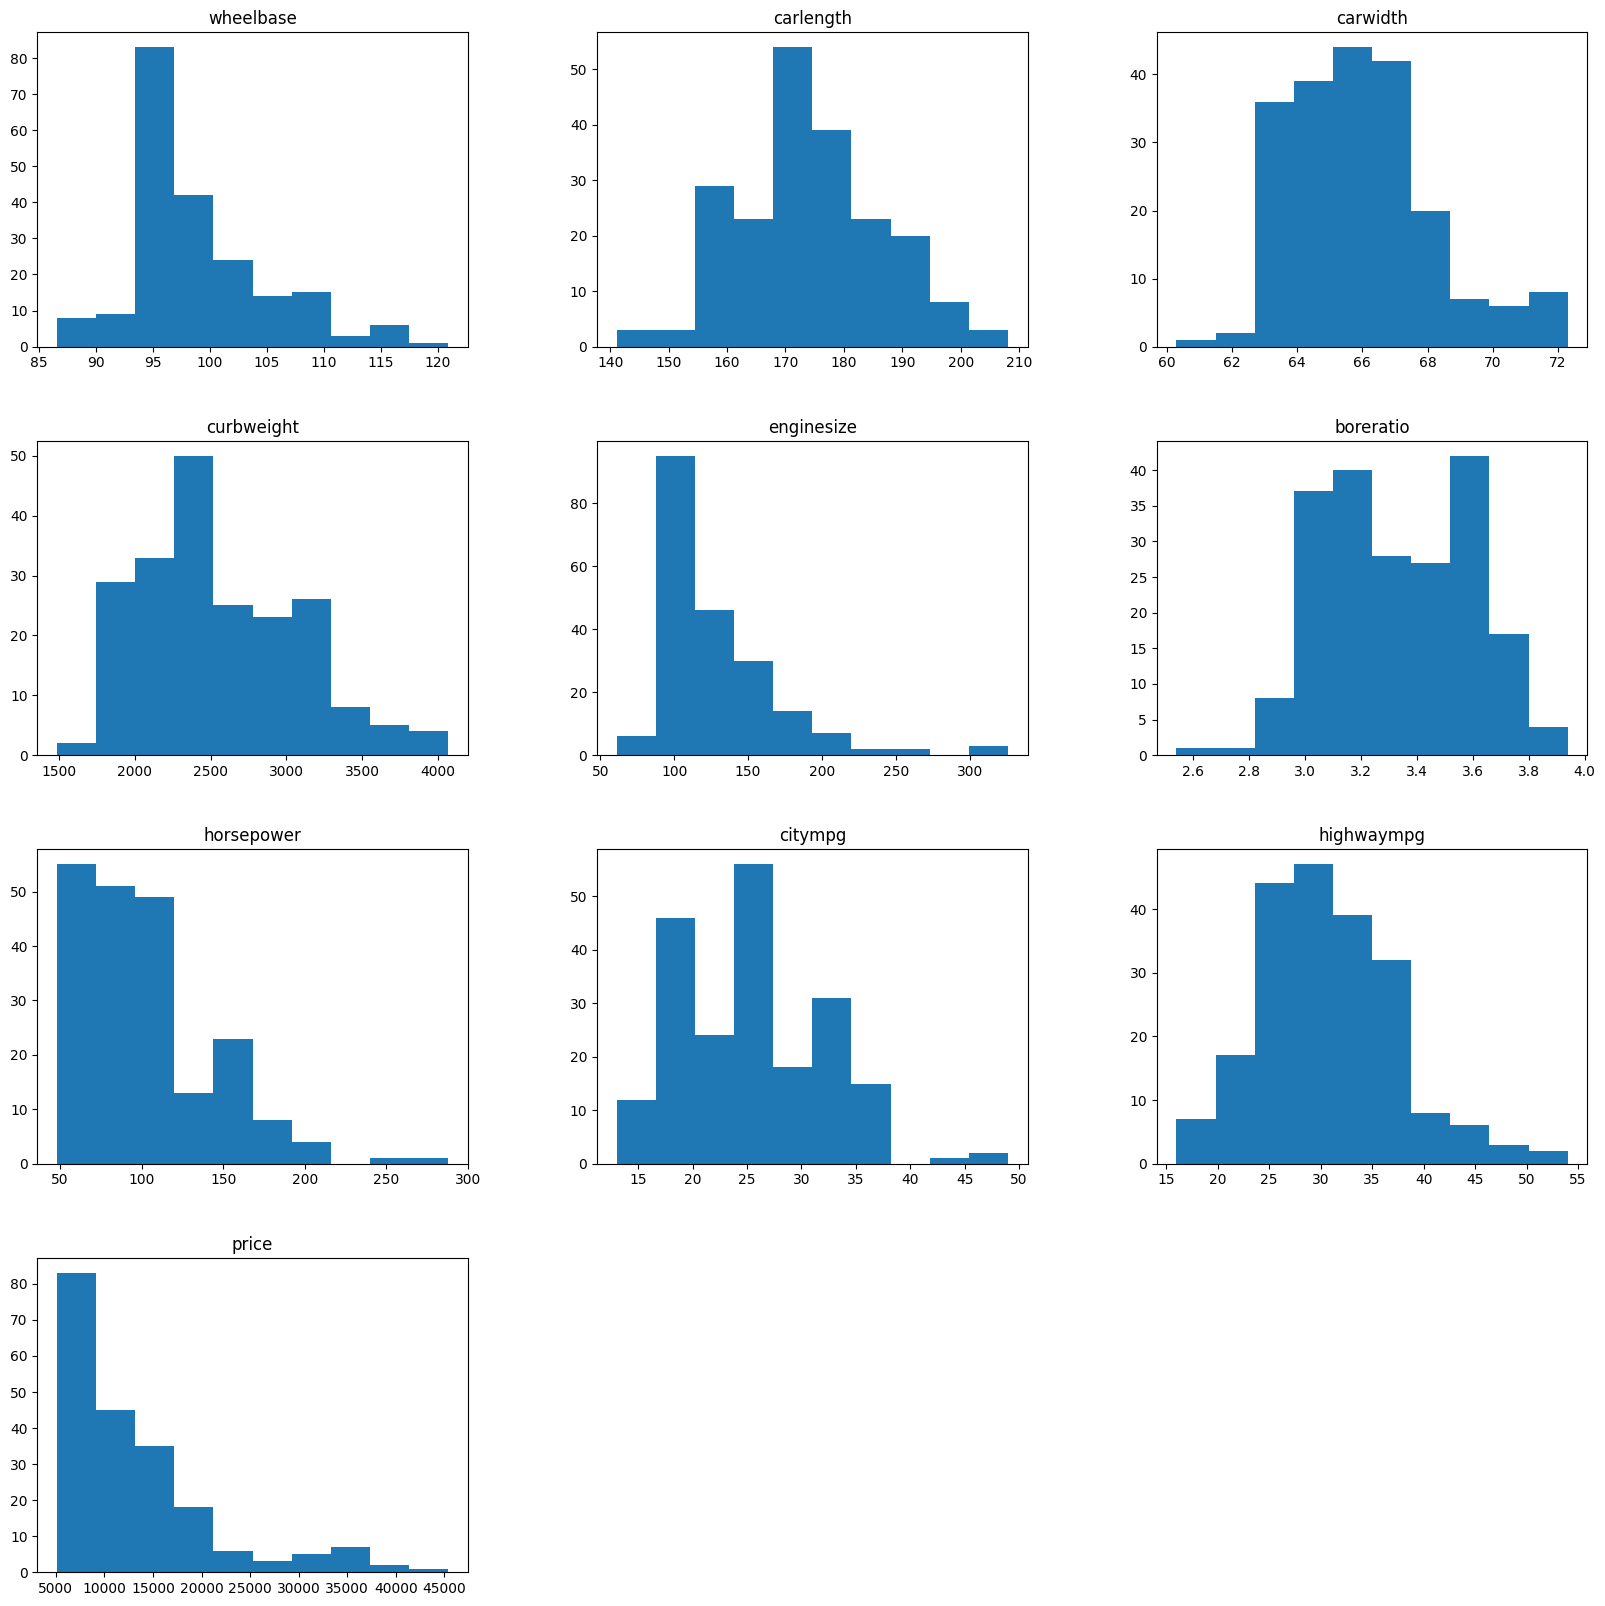

In [26]:
# now checking the distribution of the data
# now to remove the back grid lines from the histogram
df_num.hist(figsize=(20, 20), grid=False)
plt.show()


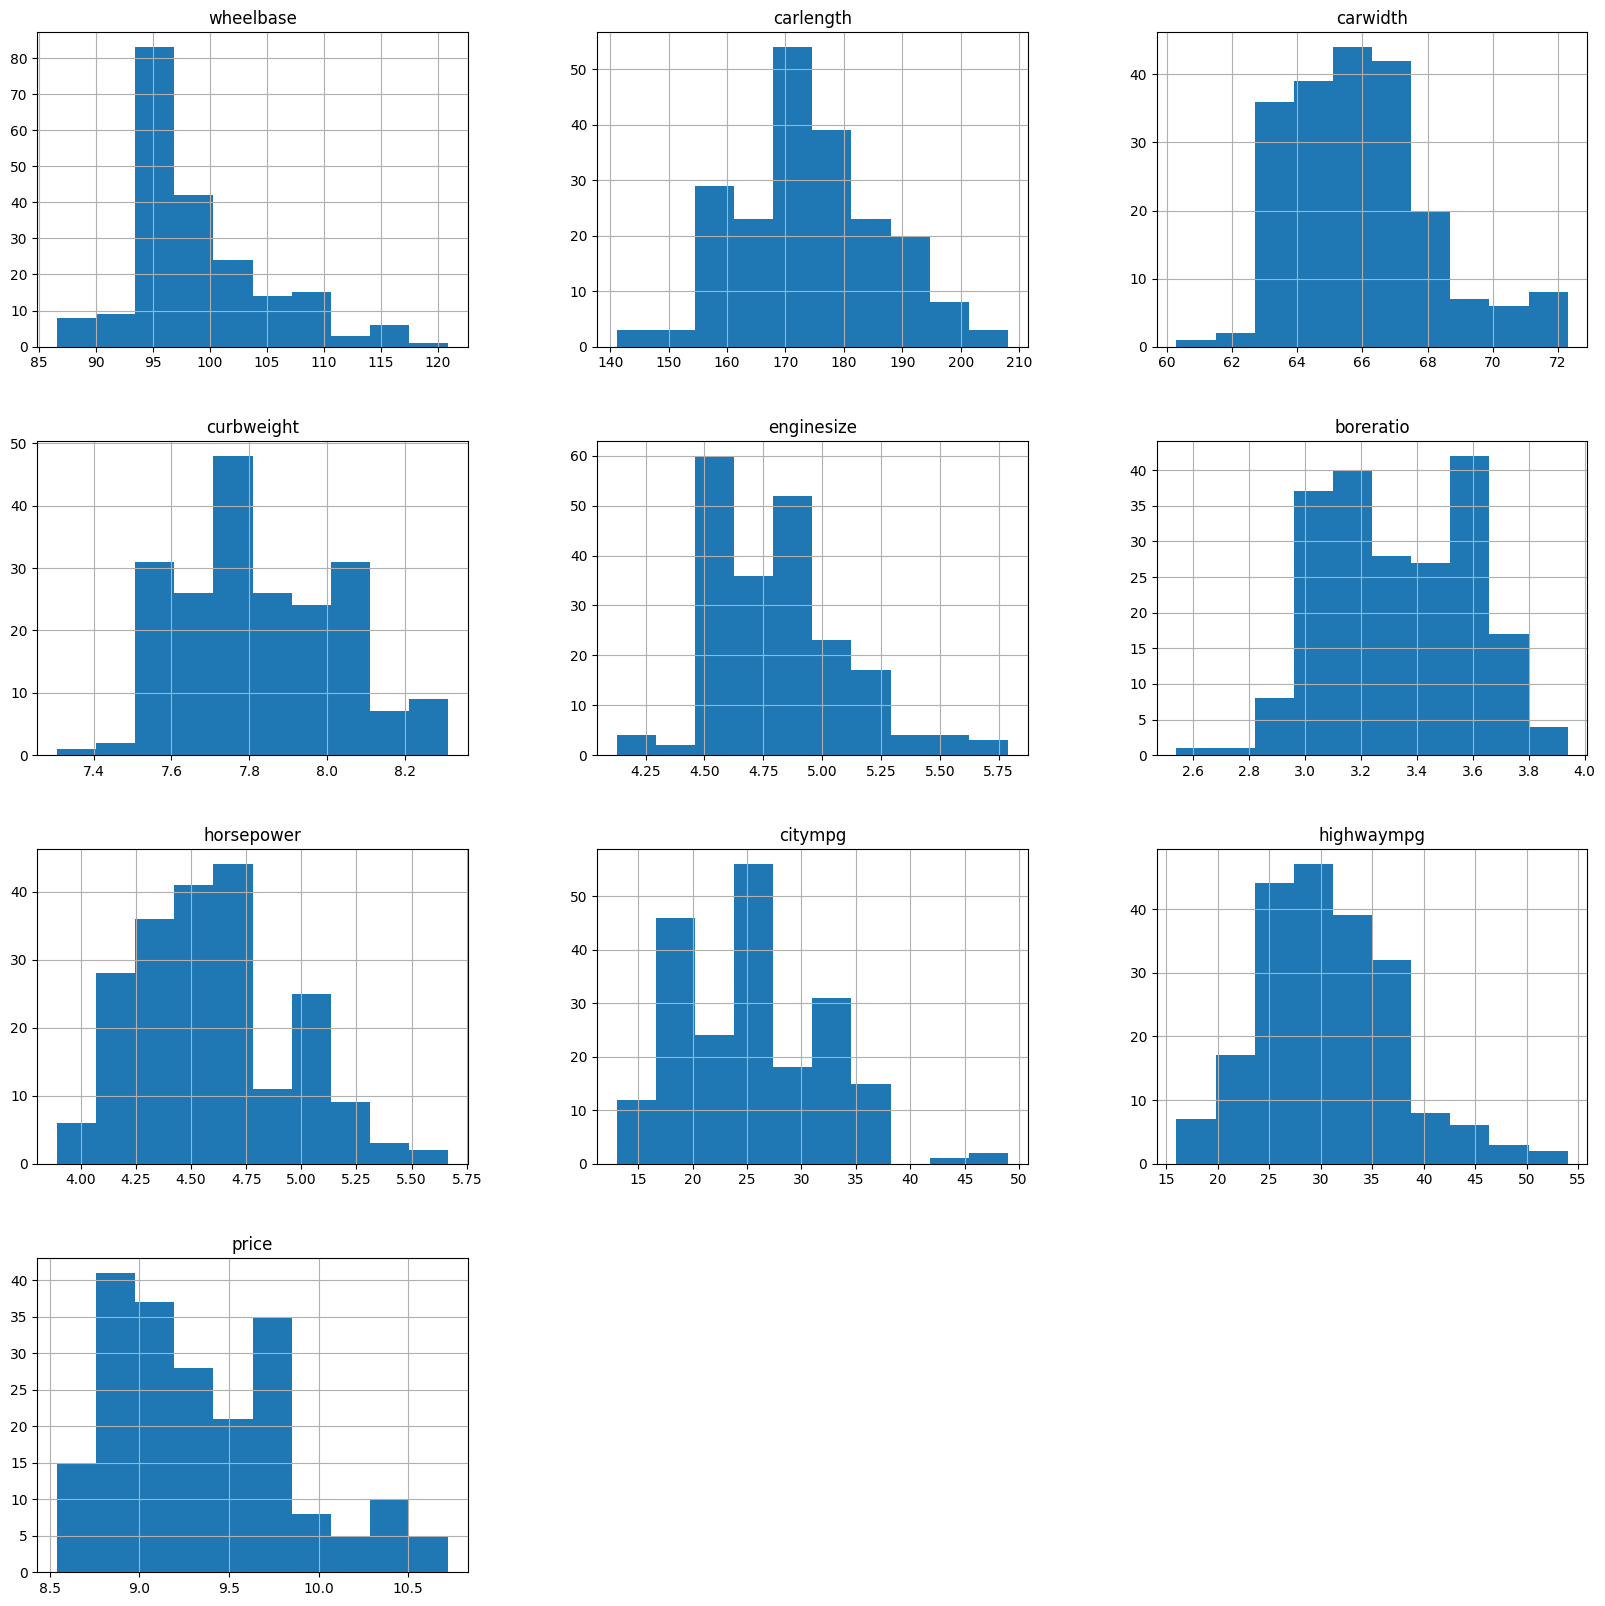

In [27]:
# now we have to normalize the price , hoursepower and engine size and car weight

# Normalizing the data
df_num['price'] = np.log1p(df_num['price'])
df_num['horsepower'] = np.log1p(df_num['horsepower'])
df_num['enginesize'] = np.log1p(df_num['enginesize'])
df_num['curbweight'] = np.log1p(df_num['curbweight'])

# now checking the distribution of the data

df_num.hist(figsize=(20, 20))
plt.show()

## **2_Feature Engineering:**

In [28]:
df['CarName'].nunique()

147

In [29]:
df['CarCompany'] = df['CarName'].apply(lambda x: x.split(' ')[0])

# now we have to bring the CarModel and CarCompany to the top of the dataframe

df = df[['CarName','CarCompany'] + [col for col in df.columns if col not in ['CarName', 'CarCompany']]]



In [30]:
# now removing the numeric columns from the df float and int
df_obj = df.drop(columns=df.select_dtypes(include=[np.number]).columns)
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CarName         205 non-null    object
 1   CarCompany      205 non-null    object
 2   fueltype        205 non-null    object
 3   aspiration      205 non-null    object
 4   doornumber      205 non-null    object
 5   carbody         205 non-null    object
 6   drivewheel      205 non-null    object
 7   enginelocation  205 non-null    object
 8   enginetype      205 non-null    object
 9   cylindernumber  205 non-null    object
 10  fuelsystem      205 non-null    object
dtypes: object(11)
memory usage: 17.7+ KB


In [31]:
# now want to remove the car name column
df_obj = df_obj.drop(columns='CarName')

In [32]:
# Initialize LabelEncoder
le_dict = {}  # Dictionary to hold the encoders for each column
encoded_columns = []  # List to store names of encoded columns

# Label Encoding
for col in df_obj.columns:
    le = LabelEncoder()
    df_obj[col] = le.fit_transform(df_obj[col])
    le_dict[col] = le  # Store the encoder for future use
    encoded_columns.append(col)

# Display the encoded DataFrame
print("Encoded DataFrame:")
print(df_obj.nunique())

# # Function to reverse the encoding
# def reverse_encoding(df, le_dict):
#     for col, le in le_dict.items():
#         df[col] = le.inverse_transform(df[col])
#     return df

# # Example of reversing the encoding
# reversed_df = reverse_encoding(df.copy(), le_dict)
# print("\nReversed Encoding DataFrame:")
# print(reversed_df)


Encoded DataFrame:
CarCompany        28
fueltype           2
aspiration         2
doornumber         2
carbody            5
drivewheel         3
enginelocation     2
enginetype         7
cylindernumber     7
fuelsystem         8
dtype: int64


In [33]:
df_obj.head()

,CarCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,1,1,0,1,0,2,0,0,2,5
1,1,1,0,1,0,2,0,0,2,5
2,1,1,0,1,2,2,0,5,3,5
3,2,1,0,0,3,1,0,3,2,5
4,2,1,0,0,3,0,0,3,1,5


# **2_Training Machine Learning Models:**

`Now I have to train all the regression models one by one`

## **1_Linear Regression:**

In [34]:
# now we have to merge the df_num and df_obj
df = pd.concat([df_num, df_obj], axis=1)

In [35]:
X= df.drop('price', axis=1)
y= df['price']
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# linear regression model
lr = LinearRegression()

# fitting the model
lr.fit(X_train, y_train)

# predicting the values

y_pred = lr.predict(X_test)

# checking the evaluation metrics

print(f'Mean Squared Error : {mean_squared_error(y_test, y_pred)}')
print(f'Mean Absolute Error : {mean_absolute_error(y_test, y_pred)}')
print(f'R2 Score : {r2_score(y_test, y_pred)}')

Mean Squared Error : 0.03364704424932866
Mean Absolute Error : 0.14364532572280883
R2 Score : 0.875971472080754


## **2_Lasso Regression:**

In [36]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [37]:
# Lasso Regression
model = Lasso()

# fitting the model
model.fit(X_train, y_train)

# predicting the values

y_pred = model.predict(X_test)

# checking the evaluation metrics

print(f'Mean Squared Error : {mean_squared_error(y_test, y_pred)}')
print(f'Mean Absolute Error : {mean_absolute_error(y_test, y_pred)}')
print(f'R2 Score : {r2_score(y_test, y_pred)}')

Mean Squared Error : 0.08215354407894905
Mean Absolute Error : 0.2318967696989153
R2 Score : 0.6971685518657632


In [38]:
# Lasso Regression
model = Ridge()

# fitting the model
model.fit(X_train, y_train)

# predicting the values

y_pred = model.predict(X_test)

# checking the evaluation metrics

print(f'Mean Squared Error : {mean_squared_error(y_test, y_pred)}')
print(f'Mean Absolute Error : {mean_absolute_error(y_test, y_pred)}')
print(f'R2 Score : {r2_score(y_test, y_pred)}')

Mean Squared Error : 0.03650561405230985
Mean Absolute Error : 0.146835455349378
R2 Score : 0.8654343145821353


In [39]:
# Lasso Regression
model = ElasticNet()

# fitting the model
model.fit(X_train, y_train)

# predicting the values

y_pred = model.predict(X_test)

# checking the evaluation metrics

print(f'Mean Squared Error : {mean_squared_error(y_test, y_pred)}')
print(f'Mean Absolute Error : {mean_absolute_error(y_test, y_pred)}')
print(f'R2 Score : {r2_score(y_test, y_pred)}')

Mean Squared Error : 0.07891163907408255
Mean Absolute Error : 0.22512978446631804
R2 Score : 0.7091187458390615
